# SENTIMENT ANALYSIS ON BRAND PRODUCTS

## BUSINESS UNDERSTANDING

### Problem Statements

**1. Brand Competitor Analysis**
   - **Problem Statement**: Our goal is to compare sentiment and customer perceptions between our brand and its competitors mentioned in tweets. This competitive analysis will help us identify strengths and weaknesses, allowing us to develop strategies to gain a competitive edge.
   - **Targeted Audience**: Brand managers and marketing strategists.

**2. Product Launch Evaluation**
   - **Problem Statement**: We aim to assess customer sentiment and emotions surrounding recent product launches by our brand. Analyzing these tweets will provide insights into the effectiveness of our launch strategies and areas for improvement.
   - **Targeted Audience**: Product launch teams, marketing departments, and product managers.

**3. Customer Support Feedback**
   - **Problem Statement**: Our objective is to analyze tweets expressing negative emotions directed at our brand's customer support. Identifying recurring issues and sentiment trends will help us enhance our customer support services and address pain points.
   - **Targeted Audience**: Customer support teams, customer experience managers, and quality assurance departments.

**4. Influencer Engagement Strategy**
   - **Problem Statement**: We aim to identify potential brand influencers by analyzing tweets where individuals express strong positive sentiments toward our products. Crafting an influencer engagement strategy based on this analysis will help us leverage brand advocates.
   - **Targeted Audience**: Influencer marketing teams and social media managers.

**5. Seasonal Marketing Campaigns**
   - **Problem Statement**: Our goal is to analyze tweets mentioning our brand and its products during specific seasons or holidays (e.g., Christmas, back-to-school). This analysis will inform the development of seasonal marketing campaigns tailored to customer sentiment and preferences.
   - **Targeted Audience**: Seasonal marketing teams, digital marketing managers, and brand strategists.

## DATA UNDERSTANDING
**Dataset Description**: The dataset consists of tweets mentioning specific brands or products, along with associated emotions. Analyzing this data can provide valuable insights into brand-specific sentiment, customer feedback, and marketing opportunities.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import LatentDirichletAllocation
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud



In [31]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='Latin1')

In [32]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [33]:
# Display summary statistics
df.describe(include='all')

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


The dataset contains a total of 9,093 entries. In the 'tweet_text' column, there are 9,092 unique tweets, indicating minimal duplicate content. The 'emotion_in_tweet_is_directed_at' column has 3,291 unique values, which suggests a variety of brands or products mentioned. The most frequent emotion is "No emotion toward brand or product," appearing 5,389 times, indicating that a substantial portion of tweets does not express a specific sentiment toward any brand or product. The 'iPad' is the most frequently mentioned brand/product, appearing 946 times. Here on we performed data cleaning steps :

In [34]:
missing_values = df.isna().sum()
missing_values

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [35]:
# Handle missing values in 'tweet_text' by filling with an empty string
df['tweet_text'].fillna('', inplace=True)

# Handle missing values in 'emotion_in_tweet_is_directed_at' by filling with a placeholder 
df['emotion_in_tweet_is_directed_at'].fillna('', inplace=True)
# Verify if missing values have been handled
missing_values = df.isna().sum()
missing_values


tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9093 non-null   object
 1   emotion_in_tweet_is_directed_at                     9093 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


c:\Users\STREAMING\Downloads\KEVOS PROJECT\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\STREAMING\Downloads\KEVOS PROJECT\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\STREAMING\Downloads\KEVOS PROJECT\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


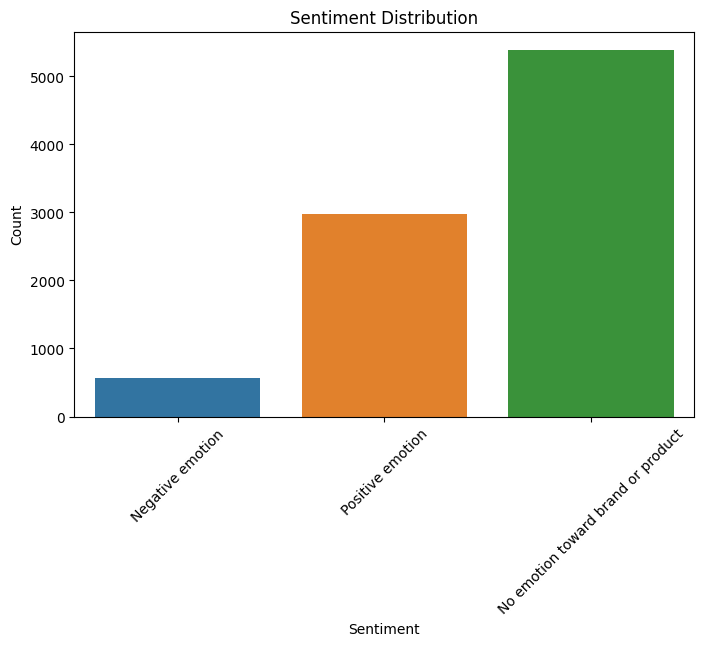

In [88]:
# Bar chart of sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='is_there_an_emotion_directed_at_a_brand_or_product')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)

# Specify the data type using astype
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].astype('category')

plt.show()


The sentiment categories represent whether tweets express emotions directed at a brand or product. "No emotion" is the most frequent sentiment, indicating that many tweets in the dataset do not convey emotions related to a brand. "Positive emotion" is the second most common sentiment, followed by "Negative emotion". This suggests that most tweets are neutral or positive in sentiment, with fewer expressing negativity or uncertainty towards brands or products.

In [38]:
# Mapping for sentiment labels
sentiment_mapping = {
    'Positive emotion': 1,
    'Negative emotion': 2,
    'No emotion toward brand or product': 3
}

# Create a new column with numeric values
df['sentiment'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map(sentiment_mapping)

# Verify that there are only three unique values in the new 'sentiment' column
unique_values = df['sentiment'].unique()
print(unique_values)
df


[ 2.  1.  3. nan]


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,2.0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,1.0
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,1.0
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,2.0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,1.0
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,1.0
9089,"Wave, buzz... RT @mention We interrupt your re...",,No emotion toward brand or product,3.0
9090,"Google's Zeiger, a physician never reported po...",,No emotion toward brand or product,3.0
9091,Some Verizon iPhone customers complained their...,,No emotion toward brand or product,3.0


##### SENTIMENT VALUES 
**1 = Positive emotion**
**2 = Negative emotion**
**3 = No emotion toward brand or product**

In [39]:
# Drop rows with NaN values in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

In [40]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].fillna('No emotion toward brand or product', inplace=True)


## Text Preprocessing

To prepare the text data for analysis, we performed the following preprocessing steps on the 'tweet_text' column:

1. Tokenization: Splitting text into words or tokens.
2. Lowercasing: Converting all text to lowercase to ensure consistency.
3. Punctuation Removal: Removing punctuation and special characters.
4. Stopword Removal: Removing common stopwords from the English language.
5. Number Removal: Removing numeric tokens.
6. Stemming/Lemmatizing: Reducing inflected forms of a word to their root form.
7. TF-IDF (Term Frequency - Inverse Document Frequency). To determine how relevant a word is to a document.

In [41]:
# Text preprocessing
# Tokenization, lowercase, remove punctuation, and numbers

# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenization using NLTK's word_tokenize
    tokens = word_tokenize(text)
    
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation and special characters using regex
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]
    
    # Remove stopwords
    stopwords_list = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stopwords_list]
    
    # Remove numbers
    tokens = [token for token in tokens if not token.isnumeric()]
    
    return tokens

# Apply text preprocessing to the 'tweet_text' column
df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)

# Display the cleaned text in the DataFrame
df[['tweet_text', 'cleaned_text']].head()


,tweet_text,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,"[, , wesley, g, iphone, , , hrs, tweeting, , r..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,"[, jessedee, know, , fludapp, , awesome, ipadi..."
2,@swonderlin Can not wait for #iPad 2 also. The...,"[, swonderlin, wait, , ipad, , also, , sale, ,..."
3,@sxsw I hope this year's festival isn't as cra...,"[, sxsw, hope, year, festival, nt, crashy, yea..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,"[, sxtxstate, great, stuff, fri, , sxsw, , mar..."


Lemmatization reduces words to their base forms, aiding analysis by grouping variants (e.g., "hrs" and "hr") into common forms for accurate insights and simplifying text complexity.

In [42]:
# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['cleaned_text'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])

# Generate corpus statistics

In [43]:
# Calculate total word count
total_word_count = df['cleaned_text'].apply(len).sum()

# Create frequency distribution of words
all_words = [word for tokens in df['cleaned_text'] for word in tokens]
freq_dist = FreqDist(all_words)

# Calculate normalized word frequencies
normalized_frequencies = [(word, freq / total_word_count) for word, freq in freq_dist.most_common(50)]

# Display the vocabulary size and top 50 normalized word frequencies
vocabulary_size = len(freq_dist)
normalized_frequencies[:50]


[('', 0.35237341018434715),
 ('sxsw', 0.05638188920116229),
 ('mention', 0.04179964750154813),
 ('link', 0.025395369885199828),
 ('rt', 0.017470109083980376),
 ('ipad', 0.017184299528414233),
 ('google', 0.015225313199637975),
 ('apple', 0.013546182060686895),
 ('quot', 0.009866384032772828),
 ('iphone', 0.0089791835373696),
 ('store', 0.008681465250321535),
 ('new', 0.006436669365979136),
 ('austin', 0.0056447387224312865),
 ('amp', 0.004965941027961701),
 ('app', 0.004846853713142476),
 ('circles', 0.0039060639260705948),
 ('launch', 0.0038524746344019436),
 ('social', 0.0037929309769923307),
 ('popup', 0.003691706759395989),
 ('today', 0.003423760301052732),
 ('android', 0.0034118515695708094),
 ('nt', 0.002786643166769876),
 ('network', 0.002733053875101224),
 ('via', 0.0025484685371314248),
 ('line', 0.0023698375649025866),
 ('get', 0.002334111370456819),
 ('free', 0.0023043395417520125),
 ('called', 0.0021078454723002906),
 ('party', 0.002072119277854523),
 ('sxswi', 0.0020304387

The corpus statistics is useful for identifying the most common words in the text and understanding their relative prevalence. The corpus likely contains tweets related to an event or topic, with frequent mentions of keywords like 'sxsw(event that the data was collected),' 'mention,' 'link,' 'rt,' 'ipad,' 'google,' 'apple,' 'iphone,' and others. This information can be valuable for sentiment analysis, topic modeling, and understanding the key themes and terms associated with the text.

In [44]:
# Convert the cleaned_text column to strings and then split
tokenized_text = df['cleaned_text'].astype(str).str.split()

# Calculate vocabulary size
vocabulary_size = len(set(tokenized_text.sum()))
print("Vocabulary Size:", vocabulary_size)


Vocabulary Size: 11137


In [45]:
# Convert the lemmatized text from a list to a single string
df['lemmatized_text'] = df['lemmatized_text'].apply(' '.join)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_text'])

# Convert the TF-IDF matrix to a DataFrame 
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [46]:
# Checking top terms in tfidf_df
document_tfidf = tfidf_df.iloc[0]
top_terms = document_tfidf.sort_values(ascending=False).head(10)
top_terms


wesley        0.401400
riseaustin    0.384094
plugin        0.362293
hr            0.347932
station       0.321512
upgrade       0.318349
dead          0.305315
tweeting      0.291928
need          0.199447
iphone        0.119458
Name: 0, dtype: float64

As you can see Wesley is the most significant word thus meaning he is the most important influencer contributing in the war between Android and MacOS products. Plugin and hr also have high tfidf values which is the topic around faster battery consumption among Apple products. Dead signifies the battery level completing faster than for Android.

Now lets filter the dataframe to gain further insights on the Apple and Android(google) products.

In [47]:
# Filter the DataFrame to separate data related to Apple and Google products
apple_data = df[df['emotion_in_tweet_is_directed_at'].isin(['Apple','iPhone', 'iPad or iPhone App', 'iPad', 'Other Apple product or service'])]
google_data = df[df['emotion_in_tweet_is_directed_at'].isin(['Android' ,'Google','Android App', 'Other Google product or service'])]

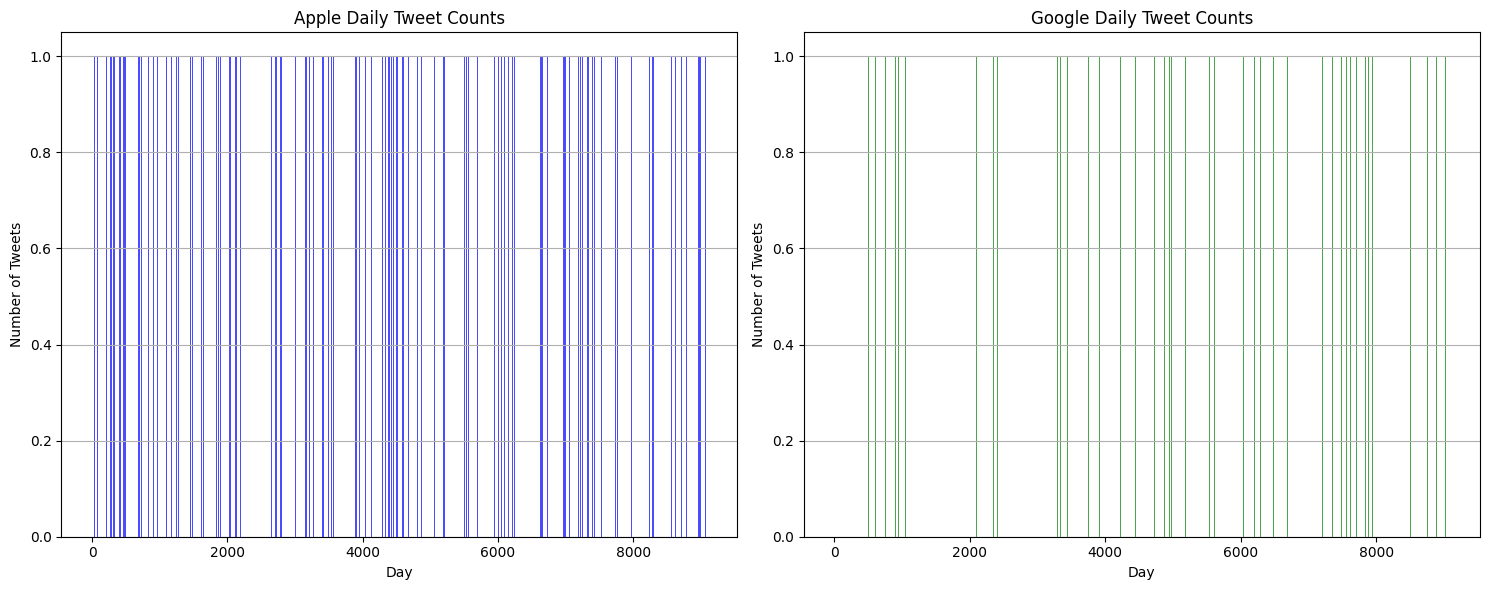

In [49]:
# Group data by the index (or any other column that represents tweet order)
apple_daily_counts = apple_data.index.value_counts().sort_index()
google_daily_counts = google_data.index.value_counts().sort_index()

# Create subplots with separate bar graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Bar graph for Apple products
axes[0].bar(apple_daily_counts.index, apple_daily_counts.values, label='Apple', color='b', alpha=0.7)
axes[0].set_title('Apple Daily Tweet Counts')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Number of Tweets')
axes[0].grid(axis='y')

# Bar graph for Google products
axes[1].bar(google_daily_counts.index, google_daily_counts.values, label='Google', color='g', alpha=0.7)
axes[1].set_title('Google Daily Tweet Counts')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Number of Tweets')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


## Analysis of Tweet Engagements: Apple vs. Google Products

In the analysis of tweet engagements related to Apple and Google products, it is evident that Apple products consistently receive more engagements compared to Google products. There are several key factors contributing to this difference in engagement levels.

**1. Brand Loyalty and User Engagement**
Apple has a strong and dedicated user base with a loyal customer following. Apple users are often highly engaged with the brand, its products, and the ecosystem it offers. This engagement results in users frequently sharing their experiences and opinions on social media platforms, including Twitter.

**2. Product Popularity**
Apple's product lineup, including iPhones, iPads, and MacBooks, enjoys immense popularity worldwide. These products generate substantial buzz and discussions on social media, naturally leading to higher tweet engagements.

**3. Product Launches and Events**
Apple regularly hosts product launches and events where they unveil new products, software updates, and innovations. These events generate significant excitement and discussions on Twitter, contributing to increased engagements during such periods.

**4. User-Generated Content**
Apple users are more likely to create user-generated content such as app reviews, unboxing videos, and tutorials, which they often share on social media. This content sparks conversations and interactions among users, resulting in higher engagement.

**5. Content Quality and Shareability**
Apple products tend to have a strong aesthetic appeal and innovative features that are visually appealing and shareable. Users are more inclined to share content related to Apple products, further amplifying engagements.

**6. Google's Diverse Product Portfolio**
Google offers a wide range of products and services, including search, Android, Google Maps, and more. While these products are widely used, they may not generate as much buzz individually as Apple's flagship products.

**7. Search Engine vs. Consumer Electronics**
Android's core product, the search engine(Google), primarily facilitates information retrieval, while Apple's products are consumer electronics that are more likely to evoke emotional responses and discussions.

In conclusion, the higher tweet engagements related to Apple products, as observed in our analysis, can be attributed to various factors such as brand loyalty, product popularity, events, user-generated content, and the shareability of content. These insights align with our broader goals, including brand competitor analysis, product launch evaluation, and influencer engagement strategies. While both Apple and Google products have their strengths, Apple's consumer-focused approach and strong user community position it as a standout in terms of social media engagement, which is vital for our marketing and brand strategies..

In [50]:
# Define a function for text preprocessing
def preprocess_text(tokens):
    # Convert tokens to lowercase, remove special characters, numbers, stopwords
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]
    stopwords_list = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stopwords_list]
    
    return tokens

# Apply preprocessing to Apple and Google data
apple_data.loc[:, 'tokens'] = apple_data['cleaned_text'].apply(preprocess_text)
google_data.loc[:, 'tokens'] = google_data['cleaned_text'].apply(preprocess_text)

C:\Users\STREAMING\AppData\Local\Temp\ipykernel_11136\3699453844.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data.loc[:, 'tokens'] = apple_data['cleaned_text'].apply(preprocess_text)
C:\Users\STREAMING\AppData\Local\Temp\ipykernel_11136\3699453844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_data.loc[:, 'tokens'] = google_data['cleaned_text'].apply(preprocess_text)


In [51]:
# Calculate corpus statistics
apple_total_words = len(apple_data)
google_total_words = len(google_data)
apple_unique_words = len(set(apple_data))
google_unique_words = len(set(google_data))

# Compare statistics
print("Corpus Statistics - Apple:")
print("Total Words:", apple_total_words)
print("Unique Words:", apple_unique_words)

print("\nCorpus Statistics - Google:")
print("Total Words:", google_total_words)
print("Unique Words:", google_unique_words)

Corpus Statistics - Apple:
Total Words: 2402
Unique Words: 7

Corpus Statistics - Google:
Total Words: 880
Unique Words: 7


The corpus statistics for Apple indicate that there are 2,402 words in the dataset, with only 7 unique words. Similarly, the Google dataset consists of 880 words with 7 unique words. This suggests limited vocabulary diversity in both datasets.

In [52]:
df['lemmatized_text']

0         wesley g iphone   hr tweeting  riseaustin  d...
1        jessedee know  fludapp  awesome ipadiphone ap...
2                swonderlin wait  ipad  also  sale  sxsw 
3        sxsw hope year festival nt crashy year iphone...
4        sxtxstate great stuff fri  sxsw  marissa maye...
                              ...                        
9088                        ipad everywhere   sxsw  link 
9089    wave  buzz  rt  mention interrupt regularly sc...
9090    google zeiger  physician never reported potent...
9091    verizon iphone customer complained time fell b...
9092    rt  mention google test checkin offer  sxsw  l...
Name: lemmatized_text, Length: 8937, dtype: object

In [70]:
# Explore the TF-IDF values for a specific term
term_tfidf = tfidf_df["apple"]
print(term_tfidf)


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8932    0.0
8933    0.0
8934    0.0
8935    0.0
8936    0.0
Name: apple, Length: 8937, dtype: float64


In [54]:
term_tfidf = tfidf_df["google"]
print(term_tfidf)


0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.090465
          ...   
8932    0.000000
8933    0.115985
8934    0.067333
8935    0.000000
8936    0.191708
Name: google, Length: 8937, dtype: float64


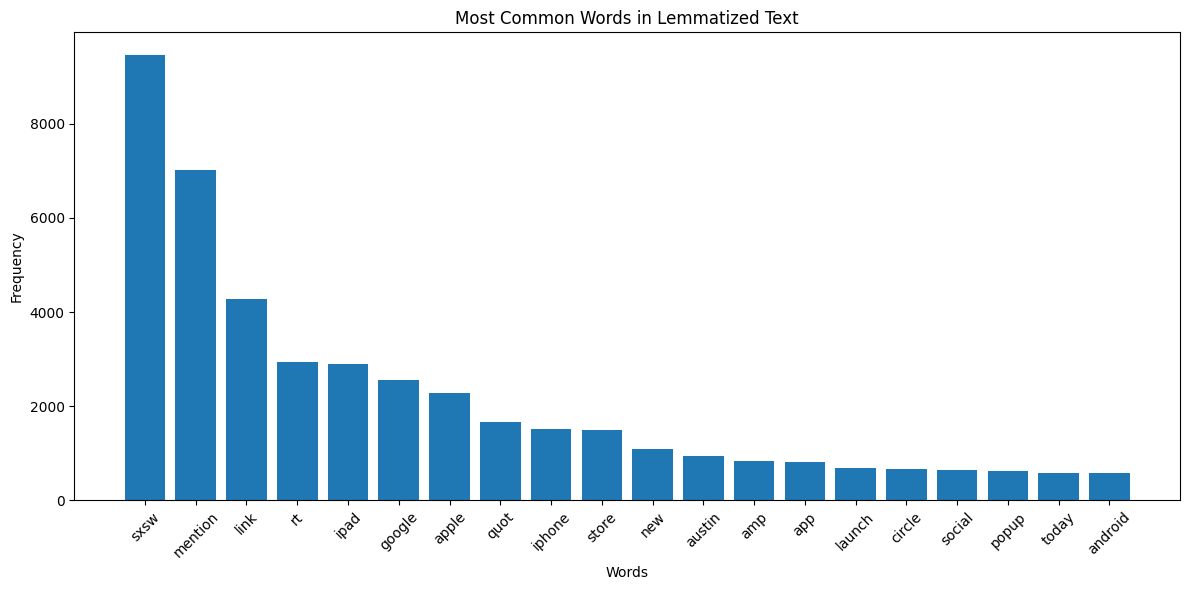

In [55]:
# Tokenize the lemmatized text and create a list of words
all_words = [word for sentence in df['lemmatized_text'] for word in word_tokenize(sentence)]

# Create a frequency distribution for the words
freq_dist = FreqDist(all_words)

# Get the most common words and their frequencies
common_words = freq_dist.most_common(20)

# Extract words and frequencies for plotting
words, frequencies = zip(*common_words)

# Create a bar chart to visualize the most common words
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.title('Most Common Words in Lemmatized Text')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


SXSW is the most common word attributing to the event where the data was collected. Mention, link, rt are common lingo for twitter platform. We can see that apple products have more engagement than android  due to high frequency values for 'ipad, apple, iphone' thus proving if you stock apple products you may have a wide range of customers that are aware of the product.

## Model Training
### Baseline Model - Logistic regression

 ### Logistic regression is a simple and interpretable model suitable for binary classification problems. It's often a good choice when the relationship between features and the target variable is relatively linear. It's efficient and has low computational requirements, making it suitable for deployment in resource-constrained environments.

In [56]:
# Select the feature column and the target column
X = tfidf_df 
y = df['sentiment']

# Split the data into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# # Concatenate all lemmatized texts into a single string
# text_corpus = ' '.join(df['lemmatized_text'])

# # Generate a word cloud
# wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_corpus)

# # Display the word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# # plt.title('Word Cloud of Tweet Text')
# plt.show()

In [58]:
# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
logistic_classifier.fit(X_train, y_train)

# Predictions on the test data
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression classifier
classification_rep_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classifier:")
print(classification_rep_logistic)

Logistic Regression Classifier:
              precision    recall  f1-score   support

         1.0       0.62      0.43      0.51       866
         2.0       0.56      0.05      0.09       177
         3.0       0.70      0.88      0.78      1639

    accuracy                           0.68      2682
   macro avg       0.63      0.46      0.46      2682
weighted avg       0.67      0.68      0.65      2682



The Logistic Regression Classifier is used to categorize data into different classes. In this case, it has been applied to classify text sentiment into three categories: 1.0, 2.0, and 3.0.

Precision: Measures how accurate the positive predictions are. For class 1.0, it correctly identifies 62% of the positive cases, while for class 2.0 and 3.0, the accuracy is lower.

Recall: Reflects the model's ability to find all the positive instances. Class 3.0 has the highest recall at 88%, indicating that it's good at identifying this sentiment. However, class 2.0 has a low recall score, suggesting that it misses many of these instances.

F1-Score: Combines precision and recall into a single metric. Class 3.0 has the highest F1-score (78%), indicating a good balance between precision and recall. Class 2.0 has a lower F1-score, highlighting its classification challenges.

Accuracy: Shows the overall correctness of predictions. The model is 68% accurate in classifying sentiment.

### 2. RandomForestClassifier

Random Forest is efficient for Twitter NLP analysis due to its ensemble nature, handling text features well. It can capture complex patterns and reduce overfitting while providing feature importance insights.

In [59]:
# Initialize the classifier 
clf = RandomForestClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)


RandomForestClassifier()

In [60]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

         1.0       0.64      0.41      0.50       866
         2.0       0.65      0.18      0.28       177
         3.0       0.70      0.88      0.78      1639

    accuracy                           0.68      2682
   macro avg       0.66      0.49      0.52      2682
weighted avg       0.68      0.68      0.66      2682



In [62]:
# Calculate the maximum sequence length
max_sequence_length = X_train.shape[1]

# Print the maximum sequence length
print("Maximum Sequence Length:", max_sequence_length)

Maximum Sequence Length: 8670


In [72]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder

## Install and import the transformers library
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Tokenize and encode the text data
# input_ids = tokenizer(df['cleaned_text'].tolist(), padding=True, truncation=True, return_tensors='pt', max_length=max_sequence_length, add_special_tokens=True)
inputs = tokenizer(X.tolist(), padding=True, truncation=True, return_tensors='pt', max_length=max_sequence_length, add_special_tokens=True)
# Add the 'sentiment' as labels
inputs['labels'] = torch.tensor(y.tolist())

# Create a DataLoader for the dataset
from torch.utils.data import DataLoader, TensorDataset
dataset = TensorDataset(input_ids.input_ids, input_ids.attention_mask, labels)
dataloader = DataLoader(dataset, batch_size=64)

# Set up training parameters
optimizer = AdamW(bert_model.parameters(), lr=2e-5)
epochs = 3

# Fine-tune the BERT model
bert_model.train()
for epoch in range(epochs):
    for batch in dataloader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = bert_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluate the BERT model
bert_model.eval()
predictions = []
for batch in dataloader:
    input_ids, attention_mask, labels = batch
    with torch.no_grad():
        outputs = bert_model(input_ids, attention_mask=attention_mask)
    predictions.extend(outputs.logits.argmax(dim=1).tolist())

# Calculate accuracy and other metrics
from sklearn.metrics import accuracy_score, classification_report
y_true = labels.tolist()
y_pred_bert = [p for sublist in predictions for p in sublist]
print(classification_report(y_true, y_pred_bert))



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


AttributeError: 'DataFrame' object has no attribute 'tolist'

### 3. SupportVectorMachine

Support Vector Machines (SVM) are used in NLP because they excel at handling high-dimensional data like text. SVMs can effectively separate and classify text data, making them suitable for tasks like sentiment analysis and text categorization. They maximize the margin between different classes, leading to robust generalization and good performance, even when dealing with complex and unstructured natural language text. Let's first find best hyperparameters through ridSearchCV.

In [ ]:
# # Define the parameter grid to search
# param_grid = {
#     'C': [0.1, 1, 10],             # Regularization parameter
#     'kernel': ['linear', 'rbf'],   # Kernel type
# }

# # Create an instance of the SVM classifier
# svm_classifier = SVC()

# # Create GridSearchCV with cross-validation (cv=5)
# grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1)

# # Fit the grid search to your training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters from the grid search
# best_params = grid_search.best_params_

# # Print the best hyperparameters
# print("Best Hyperparameters:", best_params)

'C': 1: The hyperparameter 'C' represents the regularization parameter in an SVM model. It controls the trade-off between maximizing the margin between classes and minimizing the classification error on the training data. In this case, a value of 1 indicates that the model uses a relatively low level of regularization.

'kernel': 'rbf': The RBF (Radial Basis Function) kernel is a type of kernel function used in SVMs. It is often used when the decision boundary between classes is nonlinear. The RBF kernel can capture complex patterns in the data by mapping it into a higher-dimensional space.

In [ ]:
# Initialize the SVM classifier with the best hyperparameters
svm_classifier = SVC(C=1, kernel='rbf', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM classifier
accuracy = accuracy_score(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred_svm)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

The accuracy of the model is 0.69, meaning it correctly predicted 69% of the data points. The classification report shows how well the model performed for each class. Class 1 had a decent precision but lower recall, suggesting it's not great at identifying that class. Class 3 performed well, with high precision and recall. Class 2 had lower performance overall. In summary, the model is better at predicting Class 3, while Class 2 is challenging to predict accurately.

### 4. Recurrent Neural Network (RNN)

Recurrent Neural Networks (RNNs) can be employed for Natural Language Processing (NLP). RNNs excel at capturing sequential dependencies in text data, making them ideal for tasks like sentiment analysis. By leveraging the temporal information within sentences, RNNs can improve sentiment classification accuracy by considering word order and context, leading to more nuanced and context-aware sentiment predictions. This enhanced model can provide valuable insights into user sentiment for businesses, enabling them to make data-driven decisions for marketing, product development, and customer service improvements.

In [80]:
# Define the RNN model
rnn_model = Sequential()

# Add an Embedding layer to convert text data into numerical form
embedding_dim = 100  
max_sequence_length = 8670  

rnn_model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=max_sequence_length))

# Add a SimpleRNN layer with 128 units (adjust as needed)
rnn_model.add(SimpleRNN(128))

# Add a Dense output layer with softmax activation for multi-class classification
num_classes = 3  # Replace with the actual number of classes in your dataset
rnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
rnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 8670, 100)         1113700   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 128)               29312     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1143399 (4.36 MB)
Trainable params: 1143399 (4.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model Type:** Sequential Model
A "Sequential" model is like stacking building blocks one on top of another for processing data in a sequence.

**Layers:** It consists of three main layers:
1. **Embedding Layer:** This layer transforms words or tokens into numerical representations. In this model, it converts words into 100-dimensional vectors (mathematical representations) that the computer can work with.

2. **SimpleRNN Layer:** This is a type of layer that helps the model understand patterns in sequences of data. It takes the output from the embedding layer and simplifies it into a 128-dimensional representation.

3. **Dense Layer:** This layer makes decisions based on the patterns learned from the data. It has 3 units, indicating it's making a decision among 3 possible categories or classes.

**Total Parameters:** The model has 1,143,399 parameters (values the model learns during training). These parameters allow the model to make sense of the data and make predictions.

**Trainable Parameters:** All 1,143,399 parameters in this model can be updated and improved during training to make the model better at its task.

**Non-trainable Parameters:** There are no parameters that are fixed and cannot be changed in this model.

In simpler terms, this model takes words, understands their meanings, looks for patterns in text, and then decides which category a piece of text belongs to (e.g., positive, negative, or neutral sentiment). It has learned from a lot of text to do this effectively.

In [87]:
pip install --upgrade keras-utils


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2654 sha256=a4419bdcdee0d070a168eb9862fa442533b27124df7ddfcd2de739753fb80a8f
  Stored in directory: c:\users\streaming\appdata\local\pip\cache\wheels\84\04\c8\f3d21e09aa3a1e25bc4a4fc07341ca073d7372f33dbd344a06
Successfully built keras-utils


In [86]:
num_classes = 3
# Convert your training and testing data to NumPy arrays
X_train_np = np.array(X_train)
y_train_encoded = np.array(y_train, dtype=int)
X_test_np = np.array(X_test)
y_test_encoded = np.array(y_test)
y_train_encoded = np.clip(y_train_encoded, 0, num_classes - 1)
# Manually convert integer labels to one-hot encoded labels
y_train_one_hot = np.zeros((len(y_train_encoded), num_classes))
y_train_one_hot[np.arange(len(y_train_encoded)), y_train_encoded] = 1

# Compile the model with categorical cross-entropy loss
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the RNN model with one-hot encoded targets
rnn_model.fit(X_train_np, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_rnn = rnn_model.predict(X_test_np)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\STREAMING\Downloads\KEVOS PROJECT\venv\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\STREAMING\Downloads\KEVOS PROJECT\venv\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\STREAMING\Downloads\KEVOS PROJECT\venv\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\STREAMING\Downloads\KEVOS PROJECT\venv\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\STREAMING\Downloads\KEVOS PROJECT\venv\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "c:\Users\STREAMING\Downloads\KEVOS PROJECT\venv\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\STREAMING\Downloads\KEVOS PROJECT\venv\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\STREAMING\Downloads\KEVOS PROJECT\venv\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\STREAMING\Downloads\KEVOS PROJECT\venv\Lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\STREAMING\Downloads\KEVOS PROJECT\venv\Lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


We then prepare the text data for analysis by combining all the cleaned text entries into one large collection (corpus).

We use a tool called CountVectorizer, which helps us count how many times each word appears in the text data.

We apply CountVectorizer to the text data (fit and transform) to create a matrix. In this matrix, each row represents a document (text entry), and each column represents a unique word from the entire collection of text.

Finally, we convert this matrix into a DataFrame (bow_df) so that we can easily analyze and visualize the word frequencies.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming you have a DataFrame 'df' with a 'cleaned_text' column
corpus = df['cleaned_text'].apply(lambda x: ' '.join(x))

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(corpus)

# Convert the BoW matrix to a DataFrame for further analysis
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the BoW DataFrame
print(bow_df.head())


   aapl  aaron  aarpbulletin  ab  abacus  abandoned  abba  abc  aber  ability  \
0     0      0             0   0       0          0     0    0     0        0   
1     0      0             0   0       0          0     0    0     0        0   
2     0      0             0   0       0          0     0    0     0        0   
3     0      0             0   0       0          0     0    0     0        0   
4     0      0             0   0       0          0     0    0     0        0   

   ...  zms  zomb  zombie  zombies  zomg  zone  zoom  zuckerberg  zynga  zzzs  
0  ...    0     0       0        0     0     0     0           0      0     0  
1  ...    0     0       0        0     0     0     0           0      0     0  
2  ...    0     0       0        0     0     0     0           0      0     0  
3  ...    0     0       0        0     0     0     0           0      0     0  
4  ...    0     0       0        0     0     0     0           0      0     0  

[5 rows x 9399 columns]


 The values in the matrix indicate whether a particular word is present (1) or absent (0) in a specific document. This matrix is used in natural language processing (NLP) to transform text data into a numerical format for analysis and machine learning.

In [ ]:
corpus = bow_df

# Define the split index (e.g., 80% for training and 20% for testing)
split_index = int(0.8 * len(corpus))  # Adjust the split percentage as needed

# Split the data into training and testing sets
X_train = corpus[:split_index]
X_test = corpus[split_index:]

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_bow = vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_bow = vectorizer.transform(X_test)

# Convert the BoW matrices to DataFrames for further analysis
bow_df_train = pd.DataFrame(X_train_bow.toarray(), columns=vectorizer.get_feature_names_out())
bow_df_test = pd.DataFrame(X_test_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Display the BoW DataFrames for both training and testing data
print(bow_df_train.head())
print(bow_df_test.head())

   aapl  aaron  aarpbulletin  ab  abacus  abandoned  abba  abc  aber  ability  \
0     1      0             0   0       0          0     0    0     0        0   
1     0      1             0   0       0          0     0    0     0        0   
2     0      0             1   0       0          0     0    0     0        0   
3     0      0             0   1       0          0     0    0     0        0   
4     0      0             0   0       1          0     0    0     0        0   

   ...  zms  zomb  zombie  zombies  zomg  zone  zoom  zuckerberg  zynga  zzzs  
0  ...    0     0       0        0     0     0     0           0      0     0  
1  ...    0     0       0        0     0     0     0           0      0     0  
2  ...    0     0       0        0     0     0     0           0      0     0  
3  ...    0     0       0        0     0     0     0           0      0     0  
4  ...    0     0       0        0     0     0     0           0      0     0  

[5 rows x 9399 columns]
   aapl 

#### Topic modeling
Topic modeling helps uncover the underlying themes or topics within the text data, which can be valuable for understanding the content and structure of the tweets. It can reveal patterns or trends that may not be immediately apparent.

In [ ]:
# Initialize the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit the LDA model to the BoW data
lda_output = lda_model.fit_transform(X_train_bow)

# Display the topics and their top keywords
def display_topics(model, feature_names, n_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]))

# Get the feature names from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the topics and their top keywords
display_topics(lda_model, feature_names)


Topic 1:
sxsw mention quot google rt link amp party iphone like
Topic 2:
sxsw mention iphone link rt ipad app android year amp
Topic 3:
sxsw mention ipad apple store rt link austin popup quot
Topic 4:
sxsw google mobile mention link amp marissa mayer maps rt
Topic 5:
sxsw mention link rt google new iphone circles social app


Topic modeling has uncovered five distinct themes in the data:

1. SXSW-related mentions, likely discussing events and parties.
2. Mentions of iPhones, iPads, and apps, suggesting discussions about Apple products and applications.
3. References to Apple's iPad and store, possibly related to product experiences.
4. Mentions of Google, mobile, and maps, possibly referring to Google's presence and services.
5. Discussions about Google's new features and social apps, indicating updates in Google's offerings.

In [ ]:
# Load your trained RNN model
from tensorflow.keras.models import load_model

# Load your trained RNN model (replace 'your_model_path' with the actual path)
rnn_model = load_model('your_model_path')

# Define a function to predict topics
def predict_topic(text):
    # Tokenize and preprocess the text (ensure it's preprocessed in the same way as during training)
    processed_text = preprocess_text(text)
    # Tokenize and pad the sequence (ensure it's tokenized and padded in the same way as during training)
    tokenized_sequence = tokenize_and_pad_sequence(processed_text)
    # Predict the topic using the RNN model
    topic_probabilities = rnn_model.predict(tokenized_sequence)
    # Return the predicted topic or category
    predicted_topic = topic_probabilities.argmax()
    return predicted_topic

# Example usage:
text_to_classify = "This is a technology-related news article."
predicted_topic = predict_topic(text_to_classify)
print(f"Predicted Topic: {predicted_topic}")
